In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import RBFSampler
from sklearn.base import BaseEstimator, TransformerMixin
from prettytable import PrettyTable
from sklearn.cluster import KMeans



def openFile(dataset):
    # Read the CSV file using pandas
    dataframe = pd.read_csv(dataset, header=None, skiprows=1)
    
    # Extract X_train11 and y_train11
    # X = data.iloc[:, :-1].values.astype(float)
    # y = data.iloc[:, -1].values.astype(int)
    dataframe = dataframe.to_numpy()
    X = dataframe[:,:-1]
    y = dataframe[:,-1]
    
    return X, y

X_train11, y_train11 = openFile("HW7_Pr1_S24_training_data.csv")   #passing it as training, label_train in plot file
X_test1, y_test1 = openFile("HW7_Pr1_S24_test_data.csv")
 



In [2]:
print(X_train11)

[[ 0.02845339  0.86723581]
 [-0.52635674  0.75416798]
 [ 0.74174571 -0.11282315]
 ...
 [-0.36503394  0.39895968]
 [ 0.51179643  0.59032415]
 [ 0.61637609 -0.52828321]]


Implement the first layer as a nonlinear transformation: 
(4) You can implement the second layer as a standard linear regression problem, for
example by using sklearn.linear_model.LinearRegression.

Part b)

In [3]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Initialize a KFold object with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# List to store the RMSE of each fold
rmse_scores = []
dof_list = []
Nc_list = []

# Perform 5-fold cross-validation
for train_index, val_index in kf.split(X_train11):
    print(train_index)
    # Split data
    X_train, X_val = X_train11[train_index], X_train11[val_index]
    y_train, y_val = y_train11[train_index], y_train11[val_index]

    # Train the model  # Creates a new LinearRegression object 
    model = LinearRegression()
    model.fit(X_train, y_train)
    dof = X_train.shape[1]
    # Number of constraints 
    Nc = X_train.shape[0]

    # Storing d.o.f and Nc  
    dof_list.append(dof)
    Nc_list.append(Nc)
    

    # Predict on the validation set
    y_pred = model.predict(X_val)
    # Calculate RMSE and append to list
    fold_rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(fold_rmse)
    print(rmse_scores)
    
print("DOF per fold", dof_list)
print("Number of constraints per fold", Nc_list)
# Calculate the average RMSE across all folds
average_rmse = np.mean(rmse_scores)

print("Average RMSE across 5-fold cross-validation:", average_rmse)

[  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  19  20  21  22  24  26  27  28  29  31  32  33  34  35  36  37  38  40
  41  42  43  45  46  47  48  49  50  51  52  53  56  57  58  61  62  64
  65  68  69  71  73  74  75  77  79  80  81  82  83  84  85  87  89  90
  91  92  93  94  95  97  98  99 100 102 103 104 105 106 108 109 111 112
 113 114 115 116 117 118 119 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 138 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 159 160 161 162 163 164 165 166 167 169 170 171 172
 173 175 176 177 178 179 180 181 182 183 185 186 187 188 189 190 191 192
 193 194 195 196 197 200 201 202 203 204 205 206 207 211 212 214 216 217
 219 220 222 223 224 225 226 227 228 229 230 231 232 233 234 236 238 239
 240 241 242 243 245 246 248 249 250 251 252 253 255 257 258 262 263 264
 266 267 268 269 270 271 272 273 274 276 278 279 282 283 284 285 286 287
 288 290 291 293 295 297 300 301 302 303 304 305 30

Part c)

DOF per fold [2, 2, 2, 2, 2, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800]
Number of constraints per fold [800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800]
Best Gamma: 0.25
Best RMSE: 0.5078159125543594


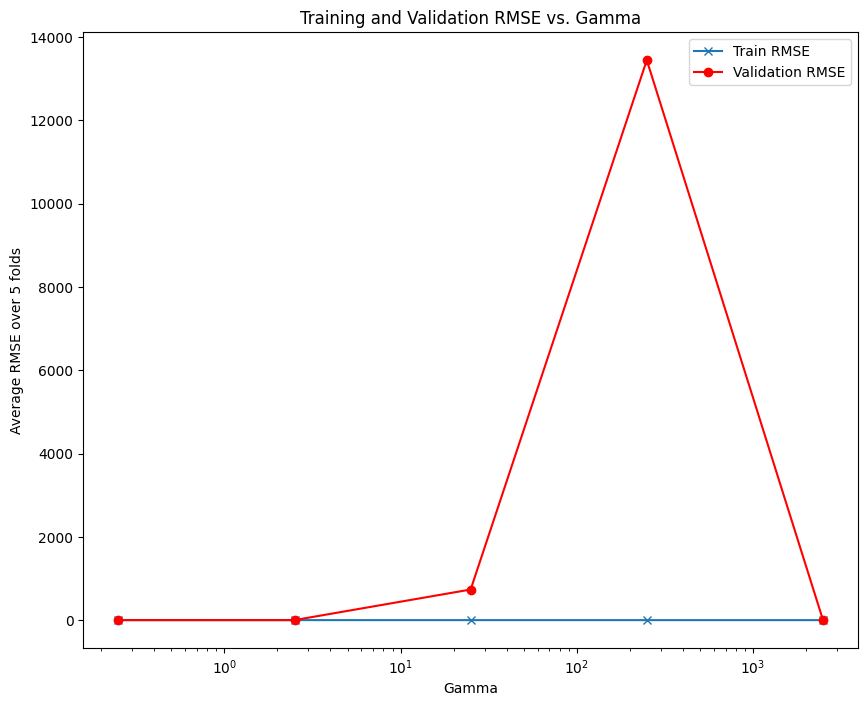

In [4]:
# Initialize parameters and data structures
M = 800
gamma_d = M / 32
gammas = [gamma_d * i for i in [0.01, 0.1, 1, 10, 100]]
kfolds = KFold(n_splits=5)
train_errors = []
validation_errors = []
train_std_errors = []
validation_std_errors = []

# Model selection loop
for gamma in gammas:
    temp_train_errors = []
    temp_val_errors = []
    for train_idx, val_idx in kfolds.split(X_train11):
        X_train, X_val = X_train11[train_idx], X_train11[val_idx]
        y_train, y_val = y_train11[train_idx], y_train11[val_idx]

        # RBF transformation
        X_train_transformed = rbf_kernel(X_train, X_train, gamma=gamma)   #using rbf kernel instead of rbf sample
        X_val_transformed = rbf_kernel(X_val, X_train, gamma=gamma)

        # Linear regression
        model = LinearRegression()
        model.fit(X_train_transformed, y_train)
        dof = X_train_transformed.shape[1]
        # Number of constraints 
        Nc = X_train_transformed.shape[0]

        # Storing d.o.f and Nc  
        dof_list.append(dof)
        Nc_list.append(Nc)

        # Prediction and error calculation
        train_preds = model.predict(X_train_transformed)
        val_preds = model.predict(X_val_transformed)
        rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
        rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
        
        temp_train_errors.append(rmse_train)
        temp_val_errors.append(rmse_val)

    # Collect average and standard deviation of errors
    train_errors.append(np.mean(temp_train_errors))
    validation_errors.append(np.mean(temp_val_errors))
    train_std_errors.append(np.std(temp_train_errors))
    validation_std_errors.append(np.std(temp_val_errors))

print("DOF per fold", dof_list)
print("Number of constraints per fold", Nc_list)
# Determine the best gamma and corresponding RMSE
best_index = np.argmin(validation_errors)
best_gamma = gammas[best_index]
best_rmse = validation_errors[best_index]

print("Best Gamma:", best_gamma)
print("Best RMSE:", best_rmse)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(gammas, train_errors, marker='x', label='Train RMSE')
plt.plot(gammas, validation_errors, marker='o', color='red', label='Validation RMSE')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Average RMSE over 5 folds')
plt.title('Training and Validation RMSE vs. Gamma')
plt.legend()
plt.show()

-------------- Without Log Scale------------------


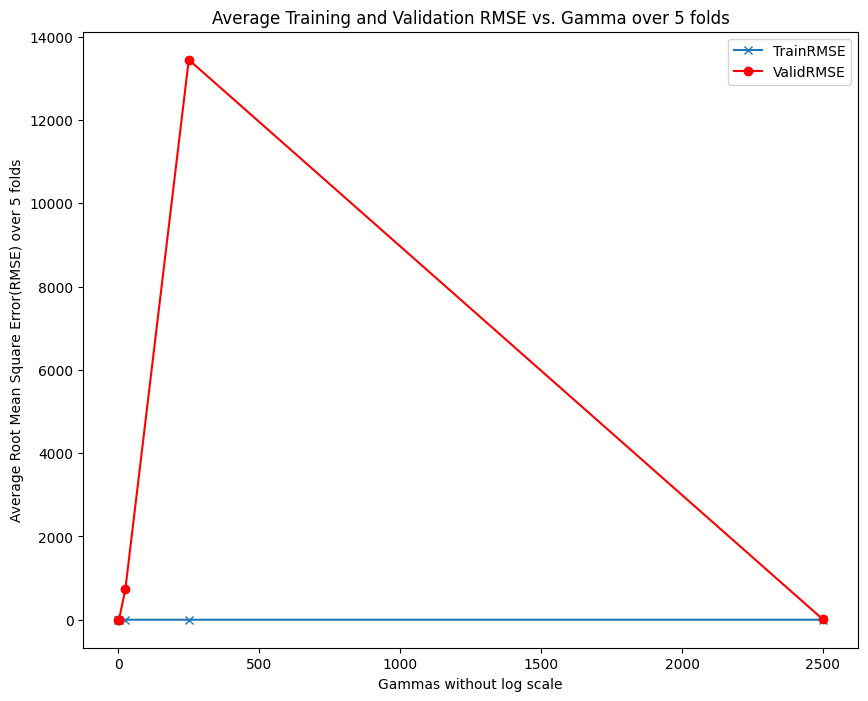

In [5]:
# Define the plotting function
plt.figure(figsize=(10,8))
plt.plot(gammas, train_errors, marker = 'x', label = 'TrainRMSE')
plt.plot(gammas, validation_errors, marker = 'o', color = 'red', label = 'ValidRMSE')
print("-------------- Without Log Scale------------------")
plt.xlabel('Gammas without log scale')
plt.ylabel('Average Root Mean Square Error(RMSE) over 5 folds')
plt.title('Average Training and Validation RMSE vs. Gamma over 5 folds')
plt.legend()
plt.show()

In [6]:
table = PrettyTable()
columns = ['Gammas', 'Validation_Avg_RMSE']
table.field_names = columns

for i in range(len(validation_errors)):
    row = [gammas[i], validation_errors[i]]
    table.add_row(row)

print(table)

+--------+---------------------+
| Gammas | Validation_Avg_RMSE |
+--------+---------------------+
|  0.25  |  0.5078159125543594 |
|  2.5   |  0.6631614682361032 |
|  25.0  |  734.8147700196243  |
| 250.0  |  13449.426376065272 |
| 2500.0 |   8.21927702706854  |
+--------+---------------------+


Part d)

In [7]:
class RBFTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, centers=None, gamma=1.0):
        self.gamma = gamma
        self.centers = centers

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return rbf_kernel(X, self.centers, gamma=self.gamma)


In [8]:
# Define a custom RBF Transformer
class RBFTransformer:
    def __init__(self, centers, gamma=1.0):
        self.gamma = gamma
        self.centers = centers
    
    def transform(self, X):
        return rbf_kernel(X, self.centers, gamma=self.gamma)

# Set range for K and define KFold
K_values = range(10, 101, 10)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables for storing results
optimal_rmse = float('inf')
optimal_k = None
optimal_gamma = None
optimal_centers = None

# Perform model selection
for K in K_values:
    gamma_d = K / 32  # Scale factor for gamma
    gamma_values = gamma_d * np.array([0.01, 0.1, 1, 10, 100])
    
    for gamma in gamma_values:
        local_validation_rmse = []

        for train_index, val_index in kf.split(X_train11):
            X_train, X_val = X_train11[train_index], X_train11[val_index]
            y_train, y_val = y_train11[train_index], y_train11[val_index]
            
            best_centers = None
            best_fold_rmse = float('inf')

            # Run K-means multiple times and pick the best result based on RMSE
            for _ in range(5):  # Running KMeans 5 times  
                kmeans = KMeans(n_clusters=K, init='random', random_state=None).fit(X_train)
                centers = kmeans.cluster_centers_
            rbf_transformer = RBFTransformer(centers=centers, gamma=gamma)

            # Transform the data using the RBF kernel
            X_train_transformed = rbf_transformer.transform(X_train)
            X_val_transformed = rbf_transformer.transform(X_val)

            # Train and validate the linear regression model
            model = LinearRegression()
            model.fit(X_train_transformed, y_train)
            dof = X_train_transformed.shape[1]
            # Number of constraints 
            Nc = X_train_transformed.shape[0]
    
            # Storing d.o.f and Nc  
            dof_list.append(dof)
            Nc_list.append(Nc)
            y_val_pred = model.predict(X_val_transformed)

            fold_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
            train_errors.append(rmse_tr)
            val_errors.append(rmse_val)
            if fold_rmse < best_fold_rmse:
                best_fold_rmse = fold_rmse
                best_centers = centers

        local_validation_rmse.append(best_fold_rmse)

        # Calculate average RMSE across folds for the current K and gamma
        avg_val_rmse = np.mean(local_validation_rmse)
        
        if avg_val_rmse < optimal_rmse:
            optimal_rmse = avg_val_rmse
            optimal_k = K
            optimal_gamma = gamma
            optimal_centers = best_centers  # Store the best centers

        gamma_train.append(np.mean(train_errors))
        gamma_val.append(np.mean(val_errors))
        gamma_std_train.append(np.std(train_errors))
        gamma_std_val.append(np.std(val_errors))
    K_errors.append(gamma_train) 
    K_valid_errors.append(gamma_val)
    K_std_errors.append(gamma_std_train)
    K_std_val_errors.append(gamma_std_val)

# Print optimal parameters and RMSE
print(f"Optimal K: {optimal_k}, Optimal Gamma: {optimal_gamma}, Best RMSE: {optimal_rmse}") 
print("DOF per fold", dof_list)
print("Number of constraints per fold", Nc_list)



NameError: name 'rmse_tr' is not defined

In [ ]:
# optimal_gamma = best_gamma  # Replace this with the actual value you found
K_values = range(10, 101, 10)
kf = KFold(n_splits=5, shuffle=True, random_state=None)

validation_rmse_per_k_optimal_gamma = []
validation_std_per_k_optimal_gamma = []

for K in K_values:
    kmeans = KMeans(n_clusters=K, init='random', random_state=None)
    kmeans.fit(X_train11)
    centers = kmeans.cluster_centers_

    local_validation_rmse = []
    for train_index, val_index in kf.split(X_train11):
        X_train, X_val = X_train11[train_index], X_train11[val_index]
        y_train, y_val = y_train11[train_index], y_train11[val_index]

        # Transform data using the optimal gamma and found centers
        X_train_transformed = rbf_kernel(X_train, centers, gamma=optimal_gamma)
        X_val_transformed = rbf_kernel(X_val, centers, gamma=optimal_gamma)

        model = LinearRegression()
        model.fit(X_train_transformed, y_train)
        y_val_pred = model.predict(X_val_transformed)

        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        local_validation_rmse.append(rmse)

    # Calculate and record the average and standard deviation of RMSE for this K using the optimal gamma
    avg_rmse = np.mean(local_validation_rmse)
    std_rmse = np.std(local_validation_rmse)
    validation_rmse_per_k_optimal_gamma.append(avg_rmse)
    validation_std_per_k_optimal_gamma.append(std_rmse)

# Assuming K_values, validation_rmse_per_k_optimal_gamma, and validation_std_per_k_optimal_gamma are already defined and filled with your data.

# Plot for Validation RMSE vs K
plt.figure(figsize=(10, 5))
plt.plot(list(K_values), validation_rmse_per_k_optimal_gamma, marker='o', linestyle='-', color='b', label='Validation RMSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Validation RMSE with Optimal Gamma')
plt.title('Validation RMSE vs. K using Optimal Gamma')
plt.grid(True)
plt.legend()
plt.show()

# Plot for Standard Deviation of RMSE vs K
plt.figure(figsize=(10, 5))
plt.plot(list(K_values), validation_std_per_k_optimal_gamma, marker='o', linestyle='-', color='r', label='Std Dev of RMSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Standard Deviation of RMSE')
plt.title('Standard Deviation of RMSE vs. K using Optimal Gamma')
plt.grid(True)
plt.legend()
plt.show()

# Plot the validation RMSE for each K using the optimal gamma
plt.figure(figsize=(10, 5))
plt.errorbar(list(K_values), validation_rmse_per_k_optimal_gamma, yerr=validation_std_per_k_optimal_gamma, fmt='-o', capsize=5)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Validation RMSE with Optimal Gamma')
plt.title('Validation RMSE and Std Dev vs. K using Optimal Gamma')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train11[:, 0], X_train11[:, 1], s=10, color='blue', label='Features')
plt.scatter(centers[:, 0], centers[:, 1], s=50, color='red', marker='x', label='Best Cluster Centers')
plt.title('Training Data Points and Best Cluster Centers')
plt.legend()
plt.show()

Testing dataset Part b)

In [ ]:
model = LinearRegression().fit(X_train11, y_train11)

test_preds = model.predict(X_test1)
rmse_test = np.sqrt(mean_squared_error(y_test1, test_preds))
print(f"RMSE while Testing Model B: {rmse_test}")

Part c) 
Results: Best Gamma: 0.25
Best RMSE: 0.5078159125543594

In [ ]:
X_train_transformed = rbf_kernel(X_train11, gamma=0.25)
model = LinearRegression()
model.fit(X_train_transformed, y_train11)

# Testing:
X_test_transformed = rbf_kernel(X_test1, X_train11, 0.25)
test_predss = model.predict(X_test_transformed)
rmse_testt = np.sqrt(mean_squared_error(y_test1, test_predss))
print(f"RMSE while Testing Model C: {rmse_testt}")

Part d):
Result: Optimal K: 100, Optimal Gamma: 3.125, Best RMSE: 0.12390165408053508

In [ ]:
for i in range(5):
    kmeans = KMeans(n_clusters=100, init='random').fit(X_train11)
    centers = kmeans.cluster_centers_

# Using optimal K and Gamma for training
training_d = rbf_kernel(X_train11, Y=centers, gamma=3.125)
testing_d = rbf_kernel(X_test1, Y=centers, gamma=3.125)
model = LinearRegression()
model.fit(training_d, y_train11)

# Testing
test_predsss = model.predict(testing_d)
rmse_test_d = np.sqrt(mean_squared_error(y_test1, test_predsss))
print(f"RMSE while Testing Model D: {rmse_test_d}")